## Maschinelles Lernen SoSe 2022

### Praktikum 7 - Alexnet Classification

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

import glob
import cv2

import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

import random
import matplotlib.pyplot as plt

In [2]:
filelist_A =  'saved_images/A/'
filelist_B = 'saved_images/B/'
IMG_HEIGHT = 500
IMG_WIDTH = 500

In [3]:
x_A_images = [x for x in sorted(os.listdir(filelist_A)) if x[-4:] == '.jpg']
x_A = np.empty((len(x_A_images), IMG_HEIGHT, IMG_WIDTH,3), dtype='float32')
y_A = np.ones((x_A.shape[0],1))

In [4]:
y_A.shape

(97, 1)

In [5]:
for i, name in enumerate(x_A_images):
    im = cv2.imread(filelist_A + name, cv2.IMREAD_UNCHANGED)
    #im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY).astype('float32')
    #im = (im - np.min(im)) / (np.max(im) - np.min(im))
    x_A[i] = im

In [6]:
x_B_images = [x for x in sorted(os.listdir(filelist_B)) if x[-4:] == '.jpg']
x_B = np.empty((len(x_B_images), IMG_HEIGHT, IMG_WIDTH,3), dtype='float32')
y_B = np.zeros((x_B.shape[0],1))

In [7]:
y_B.shape

(62, 1)

In [8]:
for i, name in enumerate(x_B_images):
    im = cv2.imread(filelist_B + name, cv2.IMREAD_UNCHANGED)
    #im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY).astype('float32')
    #im = (im - np.min(im)) / (np.max(im) - np.min(im))
    x_B[i] = im

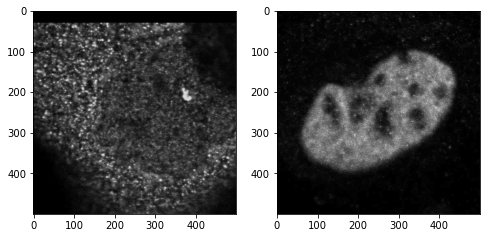

In [9]:
fig, ax = plt.subplots(1,2, figsize = (8,4))
#ax[0].imshow(x_A[3], cmap='gray')
#ax[1].imshow(x_B[3], cmap='gray')
ax[0].imshow(cv2.cvtColor(x_A[3], cv2.COLOR_BGR2GRAY), cmap='gray')
ax[1].imshow(cv2.cvtColor(x_B[3], cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()

In [10]:
#concatenate the two classes for training and validation, x contains the image, y contains the labels (0 or 1)
x = np.concatenate((x_B, x_A))
y = np.concatenate((y_B, y_A))

In [11]:
x[0].shape

(500, 500, 3)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_orig, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)

In [14]:
y_train = to_categorical(y_train_orig)

In [15]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(500,500,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(500*500*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()


2022-04-27 14:29:39.574963: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:
2022-04-27 14:29:39.574988: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-27 14:29:39.575003: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-tema): /proc/driver/nvidia/version does not exist
2022-04-27 14:29:39.575161: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 96)      34944     
_________________________________________________________________
activation (Activation)      (None, 123, 123, 96)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 61, 61, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 51, 51, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 51, 51, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 256)       0

In [16]:
# Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
x_train[0].shape

(500, 500, 3)

In [18]:
# Train
model.fit(x_train, y_train, batch_size=16, epochs=70, verbose=1, validation_split=0.1, shuffle=True)

2022-04-27 14:29:40.086204: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/70
7/7 [==============================] - 8s 997ms/step - loss: 1.6912 - accuracy: 0.5960 - val_loss: 7275.7363 - val_accuracy: 0.2500
Epoch 2/70
7/7 [==============================] - 7s 946ms/step - loss: 1.9342 - accuracy: 0.6061 - val_loss: 14668.4189 - val_accuracy: 0.7500
Epoch 3/70
7/7 [==============================] - 7s 931ms/step - loss: 0.8707 - accuracy: 0.7273 - val_loss: 1555.2970 - val_accuracy: 0.7500
Epoch 4/70
7/7 [==============================] - 7s 948ms/step - loss: 0.8749 - accuracy: 0.7071 - val_loss: 2152.2009 - val_accuracy: 0.7500
Epoch 5/70
7/7 [==============================] - 7s 941ms/step - loss: 0.7389 - accuracy: 0.7273 - val_loss: 1510.5526 - val_accuracy: 0.7500
Epoch 6/70
7/7 [==============================] - 7s 953ms/step - loss: 0.4437 - accuracy: 0.7677 - val_loss: 917.3059 - val_accuracy: 0.7500
Epoch 7/70
7/7 [==============================] - 7s 943ms/step - loss: 0.4871 - accuracy: 0.7980 - val_loss: 420.2402 - val_accuracy: 0.7500


In [19]:
# Test
y_pred = np.argmax(model.predict(x_test), axis=-1)
cmat = confusion_matrix(y_test, y_pred)

In [20]:
cmat

array([[19,  0],
       [ 9, 20]])

In [21]:
# Train
y_pred_train = np.argmax(model.predict(x_train), axis=-1)
cmat_train = confusion_matrix(y_train_orig, y_pred_train)

In [22]:
cmat_train

array([[42,  1],
       [ 8, 60]])